Most existing approaches to visual odometry are based on the following stages.

1. Acquire input images
2. Image correction: apply image processing techniques for lens distortion removal, etc.
3. Feature detection: define interest operators, and match features across frames and construct optical flow field.
       
4. Check flow field vectors for potential tracking errors and remove outliers.
5. Estimation of the camera motion from the optical flow.
       
6. Periodic repopulation of trackpoints to maintain coverage across the image.

Gathering the input images from the locally saved KITTI dataset. 

In [1]:
################################KITTI Dataset################################
#adapted from https://github.com/uoip/monoVO-python 
%run pinhole_camera.py

##kitti setup
poses_dir = 'data_odometry_gray/dataset/poses/00.txt' #for ground truth
img_dir = 'data_odometry_gray/dataset/sequences/00/image_0/'
cam = PinholeCamera(1241.0, 376.0, 718.8560, 718.8560, 607.1928, 185.2157)
with open(poses_dir) as f: poses = f.readlines()#poses
print "kitti loaded."

kitti loaded.


Performing the visual odometry

In [44]:
################################Visual Odometry################################

vo = VisualOdometry(cam, poses_dir)

traj = np.zeros((600,600,3), dtype=np.uint8)

predicted, actual = [],[]
# predicted = np.array(predicted)
# actual = np.array(actual)

frames_arr= []
import time
start = time.time()
frames = 1000
#drawing trajectories for each frame starting form the 3rd
for img_id in range(frames):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
    
    vo.update(img, img_id)

    cur_t = vo.cur_t
    
    if(img_id > 2): 
        x, y, z = cur_t[0], cur_t[1], cur_t[2]
    else: 
        x, y, z = 0., 0., 0.
        
    #offset so the 2 trajectories do not overlap
    x_offset, y_offset = 0, 0
    draw_x, draw_y = int(x)+(290-x_offset), int(z)+(90-y_offset)
    true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90
    
    #for drawing error line
    predicted.append((x,y))
    actual.append((vo.trueX, vo.trueY))
    
    #openCV uses BGR colour schemes as tuples, e.g (255,0,0) is blue
    #predicted trajectory in 
    cv2.circle(traj, (draw_x,draw_y), 1, (0,255,0), 1)
    #actual trajectory
    cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    
    #disaplying the current coordinates in the window     
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    #disaplying the current frame in the window     
    frame = "Frame: " + str(img_id)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    sec = time.time()
    curr_secs = sec - start
    curr_fps = img_id/curr_secs
    frames_arr.append(curr_fps)
    
    #disaplying the current fps in the window     
    fps = "FPS: " + str(curr_fps)
    cv2.putText(traj, frame, (30,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    cv2.imshow('Road facing camera', img)
    cv2.imshow('Trajectory', traj)
    cv2.waitKey(1)

cv2.imwrite('map.png', traj)
cv2.destroyAllWindows()
cv2.waitKey(1)

This part of the code deals with testing the performance in terms of frames per second(FPS) for 20 iterations and a random amount of frames from a range between 200 and 2000.

All the image visualisation has been removed.

In [38]:
import numpy as np
import random
import time

vo = VisualOdometry(cam, poses_dir)

total_fps = []

for i in range(20):
    frames = random.randint(200,2000)    
    start = time.time()
    frames_arr= []
    #reading the images and performing VO
    for img_id in range(frames):
        img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
        vo.update(img, img_id)
    #calculating the FPS
    end = time.time()
    seconds = end - start
    fps = frames/seconds
    total_fps.append((frames,fps))
    
print (np.array(total_fps)).reshape(20,2)

[[  908.            15.41619536]
 [ 1387.            13.82332721]
 [  806.            14.67864323]
 [ 1709.            15.09647646]
 [  895.            16.22221898]
 [ 1873.            13.93791417]
 [ 1090.            14.54724362]
 [ 1493.            14.72498275]
 [  381.            16.468722  ]
 [ 1003.            15.53817819]
 [  786.            16.25333399]
 [ 1858.            14.549254  ]
 [  698.            16.17969343]
 [ 1711.            14.73334688]
 [  228.            14.31089195]
 [ 1313.            14.46601041]
 [ 1027.            13.55001787]
 [ 1557.            14.15411182]
 [ 1759.            15.0351243 ]
 [  950.            16.33352216]]


Plotting the graphs for the FPS results from the two machines.

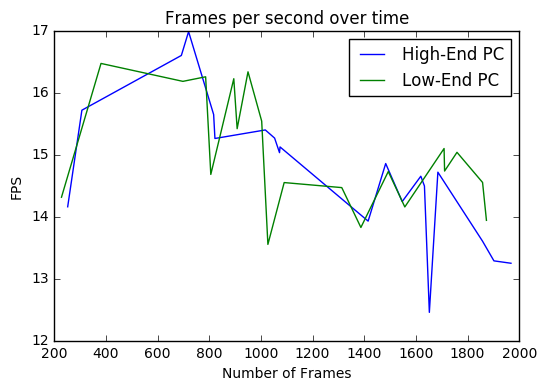

In [39]:
import matplotlib.pyplot as plt
#the tuple lists from the two machines
#for (x,y), x=number of frames, y=FPS
high_end = [(1415, 13.9256576794853), (1633, 14.49185332237826), (692, 16.597510342312937), (1902, 13.28444212071557), (1968, 13.246013748166588), (817, 15.644747387887113), (1858, 13.601159544429823), (1547, 14.241132669300056), (720, 16.981532516090148), (1053, 15.264409145525736), (1074, 15.122074834207996), (1619, 14.649727644408387), (307, 15.714578203838439), (1017, 15.396027614268148), (1072, 15.03000395066713), (1685, 14.71474354165605), (1483, 14.854063609679645), (1652, 12.453919727322866), (822, 15.258390264332748), (252, 14.15650815690624)]
low_end = [(908, 15.416195359079301), (1387, 13.823327208123809), (806, 14.678643231174892), (1709, 15.096476461535536), (895, 16.222218979230302), (1873, 13.937914172324946), (1090, 14.54724361525289), (1493, 14.72498274726146), (381, 16.468721997640543), (1003, 15.538178186024538), (786, 16.25333398956898), (1858, 14.549253998647432), (698, 16.17969343116562), (1711, 14.733346877738205), (228, 14.310891946105043), (1313, 14.46601040546894), (1027, 13.550017874333518), (1557, 14.154111818030644), (1759, 15.03512430265126), (950, 16.33352216314256)]

#sorting the values to enable visualisation and comparison 
high_sr = sorted(high_end)
low_sr = sorted(low_end)

#seperating the frames and the FPS for each list
x_high = [x[0] for x in high_sr]
y_high = [x[1] for x in high_sr]

x_low = [x[0] for x in low_sr]
y_low = [x[1] for x in low_sr]

#plotting the graph to visualise the lists
plt.plot(x_high,y_high,label='High-End PC')
plt.plot(x_low,y_low,label='Low-End PC')
plt.xlabel('Number of Frames')
plt.ylabel('FPS')
plt.title('Frames per second over time')
plt.legend()
plt.show()

This is a graph showing the error value of the predicted trajectory from VO, compared to the actual trajectory from the provided files, as the number of frames increase.

251.668180482


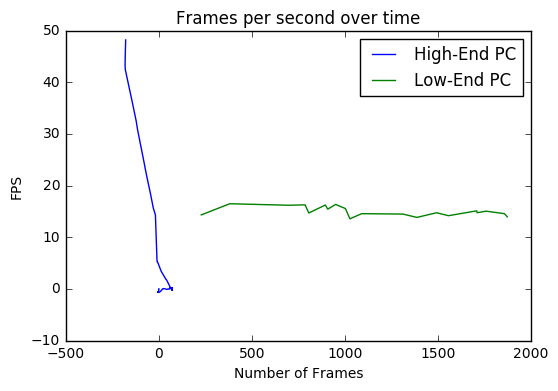

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#copying the lists from the VO method at the top
pred = np.copy(predicted)
act = np.copy(actual)
error = mean_squared_error(pred,act)
print error

x_pred = [x[0] for x in pred]
y_pred = [x[1] for x in pred]

x_act = [x[0] for x in act]
y_act = [x[1] for x in act]

#plotting the graph to visualise the lists
plt.plot(x_pred,y_pred,label='High-End PC')
plt.plot(x_low,y_low,label='Low-End PC')
plt.xlabel('Number of Frames')
plt.ylabel('FPS')
plt.title('Frames per second over time')
plt.legend()
plt.show()

In [ ]:
vo = VisualOdometry(cam, poses_dir)

# ox_vo = VisualOdometry(ox_cam, poses_dir)

traj = np.zeros((600,600,3), dtype=np.uint8)

#drawing trajectories for each frame
for img_id in range(500):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
    
    vo.update(img, img_id)

    cur_t = vo.cur_t
    if(img_id > 2): 
        x, y, z = cur_t[0], cur_t[1], cur_t[2]
    else: 
        x, y, z = 0., 0., 0.
                
    #offset so the 2 trajectories do not overlap
    x_offset, y_offset = 0, 0
    draw_x, draw_y = int(x)+(290-x_offset), int(z)+(90-y_offset)
    true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90

    #predicted trajectory
    cv2.circle(traj, (draw_x,draw_y), 1, (0,255,0), 1)#cv2 works with BGR
    #actual trajectory
    cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    frame = "Frame: " + str(img_id)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    cv2.imshow('Road facing camera', img)
    cv2.imshow('Trajectory', traj)
    cv2.waitKey(1)


cv2.imwrite('map.png', traj)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
################################Oxford Dataset################################
%run robotcar-sdk/python/camera_model.py
from skimage.io import imread_collection

#oxford(ox) setup
models_dir = 'robotcar-sdk/models'
ox_img_dir = 'oxford_2014-05-14-13-50-20/stereo/left/'
ox_cam = CameraModel(models_dir,ox_img_dir)
ox_imgs = imread_collection(ox_img_dir+'*.png', conserve_memory = True)
# ox_imgs = np.array(ox_imgs)
print "ox loaded."